## User Journey Conversion and Attribution Analysis

#### The dataset comprises of 10,000+ interactions of 2847 users across 6 different channels(Direct Traffic, Display Ads, Email, Referral, Search Ads, Social Media) along with an indicator of whether the user has converted or not. Users go through journeys that span from a single touchpoint/channel to a maximum of 12 touchpoints/channels thereby having a diversity in user journey complexity.

#### The Users are first analyzed on whether a conversion is made or not, then the user journey is mapped across the multiple touchpoints the users go through. From the user journey mapping, the optimal no of touchpoints and the conversion rates are calculated -giving valuable insights into user journey complexity. 

#### Finally, 3 Attribution Models are built comprising of First Touch, Last Touch and Data-Driven Attribution Models from which Attribution Contribution and Conversion Rates of the 6 different channels are measured and compared against to give valuable insights.

In [36]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd

# -----------------------------
# 2. Load Dataset
# -----------------------------
data = pd.read_csv('/Users/Rohan/Downloads/multi_touch_attribution_data.csv')  # update path as needed
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# -----------------------------
# 3. Sort by User and Timestamp
# -----------------------------
data = data.sort_values(['User ID', 'Timestamp'])

# -----------------------------
# 4. Group Interactions by User (Touchpoints)
# -----------------------------
user_paths = data.groupby('User ID')['Channel'].apply(list).reset_index()
user_paths.rename(columns={'Channel':'Touchpoints'}, inplace=True)

# -----------------------------
# 5. Add Conversion per User
# -----------------------------
user_paths['Conversion'] = data.groupby('User ID')['Conversion'].max().apply(lambda x: 1 if x=='Yes' else 0).values

# -----------------------------
# 6. Calculate Number of Touchpoints per User
# -----------------------------
user_paths['Num_Touchpoints'] = user_paths['Touchpoints'].apply(len)
print(user_paths.head())

# -----------------------------
# 7. Flatten for Touchpoint Position Analysis
# -----------------------------
position_data = []
for idx, row in user_paths.iterrows():
    path = row['Touchpoints']
    conv = row['Conversion']
    for i, channel in enumerate(path):
        position_data.append({
            'User ID': row['User ID'],
            'Channel': channel,
            'Position': i+1,       # Position in the journey
            'Conversion': conv
        })

pos_df = pd.DataFrame(position_data)
print(pos_df.head())

# -----------------------------
# 8. Optional: Conversion Rate by Touchpoint Position
# -----------------------------
pos_summary = pos_df.groupby(['Channel','Position'])['Conversion'].mean().reset_index()
print(pos_summary.head())

   User ID                                        Touchpoints  Conversion  \
0    10028                          [Search Ads, Display Ads]           1   
1    10045                          [Search Ads, Display Ads]           1   
2    10062              [Social Media, Direct Traffic, Email]           1   
3    10068  [Search Ads, Social Media, Social Media, Searc...           1   
4    10095  [Display Ads, Email, Referral, Display Ads, Se...           1   

   Num_Touchpoints  
0                2  
1                2  
2                3  
3                5  
4                6  
   User ID       Channel  Position  Conversion
0    10028    Search Ads         1           1
1    10028   Display Ads         2           1
2    10045    Search Ads         1           1
3    10045   Display Ads         2           1
4    10062  Social Media         1           1
          Channel  Position  Conversion
0  Direct Traffic         1    0.840491
1  Direct Traffic         2    0.876214
2  Direct

In [23]:
data.head()

,User ID,Timestamp,Channel,Campaign,Conversion
8297,10028,2025-02-10 01:44:12,Search Ads,Discount Offer,Yes
3633,10028,2025-02-11 01:03:57,Display Ads,-,Yes
9486,10045,2025-02-10 17:20:43,Search Ads,Discount Offer,No
7663,10045,2025-02-11 18:44:15,Display Ads,New Product Launch,Yes
8643,10062,2025-02-10 15:42:42,Social Media,Brand Awareness,No


In [36]:
user_paths.head()

,User ID,Touchpoints,Conversion,Num_Touchpoints
0,10028,"[Search Ads, Display Ads]",1,2
1,10045,"[Search Ads, Display Ads]",1,2
2,10062,"[Social Media, Direct Traffic, Email]",1,3
3,10068,"[Search Ads, Social Media, Social Media, Searc...",1,5
4,10095,"[Display Ads, Email, Referral, Display Ads, Se...",1,6


## EDA

#### Users Split- Conversion/No Conversion

In [51]:
# Total unique users
total_users = data['User ID'].nunique()

# Correct conversion split (based on FINAL touch only)
conversion_split = (
    data.sort_values(['User ID', 'Timestamp'])
        .groupby('User ID')
        .apply(lambda g: 'Converted' if g.iloc[-1]['Conversion'] == 'Yes' else 'Not Converted')
        .value_counts()
)

print(f"Total Users: {total_users}\n")
print("Conversion Split:")
print(conversion_split)

Total Users: 2847

Conversion Split:
Not Converted    1437
Converted        1410
Name: count, dtype: int64


C:\Users\Rohan\AppData\Local\Temp\ipykernel_29028\1854592966.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: 'Converted' if g.iloc[-1]['Conversion'] == 'Yes' else 'Not Converted')


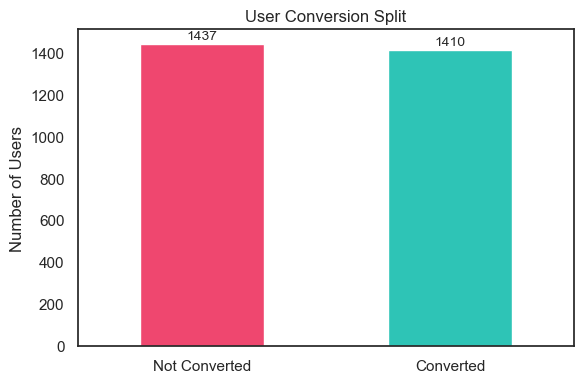

In [55]:
import matplotlib.pyplot as plt

ax = conversion_split.plot(
    kind='bar',
    color=['#EF476F', '#2EC4B6'],
    figsize=(6,4)
)

plt.title("User Conversion Split")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)

# Add data labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 10,
        int(p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

#### Of the total 2847 Unique Users, only 1410 of them end up converting(49.4% of the total users)

In [3]:
users_12 = user_paths[user_paths['Num_Touchpoints'] == 12]
print(users_12[['User ID', 'Touchpoints', 'Conversion']])

      User ID                                        Touchpoints  Conversion
101     13186  [Email, Direct Traffic, Social Media, Display ...           1
1377    53526  [Email, Display Ads, Search Ads, Display Ads, ...           1
2458    86889  [Social Media, Email, Social Media, Direct Tra...           1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#### Distribution of User Journey Lengths

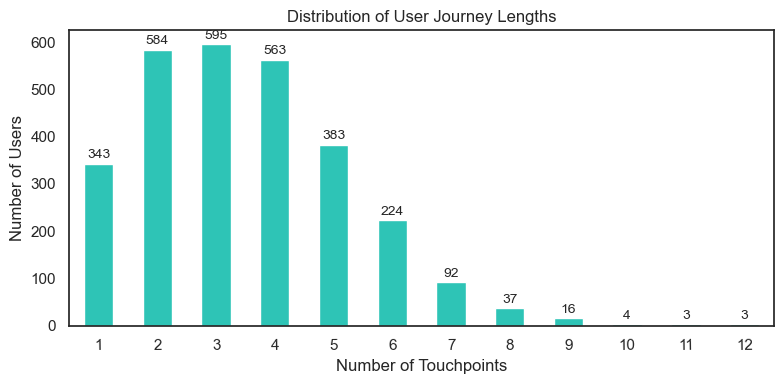

In [56]:
import matplotlib.pyplot as plt

# Plot
ax = user_paths['Num_Touchpoints'].value_counts().sort_index().plot(
    kind='bar',
    color='#2EC4B6',
    figsize=(8, 4),
    title='Distribution of User Journey Lengths'
)

# Axis labels
plt.xlabel("Number of Touchpoints")
plt.ylabel("Number of Users")

# Rotate Y-axis tick labels
plt.xticks(rotation=1)

# Add data labels
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 5,
        int(p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

#### The Distribution of User Journey reveals that of the total 2847 unique users, most of the users undergo a journey length comprising of 1-6 touchpoints. It can also be noted that there were very few users that undergo long and complex journeys( journeys beyond 7 touchpoints). If a user is to go through a complex journey, the chances are greater that the user finally ends up converting. However, it can't be determined from this plot alone

#### Journey Depth Analysis

In [4]:
touch_summary = user_paths.groupby('Num_Touchpoints').agg(
    Total_Users=('User ID', 'count'),
    Conversions=('Conversion', 'sum')
).reset_index()

touch_summary['Conversion_Rate'] = touch_summary['Conversions'] / touch_summary['Total_Users']
print(touch_summary)

    Num_Touchpoints  Total_Users  Conversions  Conversion_Rate
0                 1          343          177         0.516035
1                 2          584          431         0.738014
2                 3          595          505         0.848739
3                 4          563          524         0.930728
4                 5          383          370         0.966057
5                 6          224          220         0.982143
6                 7           92           91         0.989130
7                 8           37           37         1.000000
8                 9           16           16         1.000000
9                10            4            4         1.000000
10               11            3            3         1.000000
11               12            3            3         1.000000


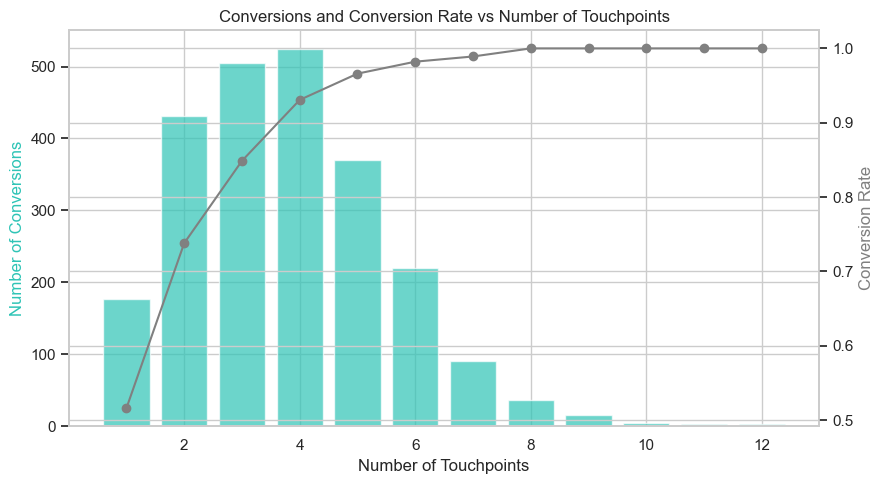

In [53]:
fig, ax1 = plt.subplots(figsize=(9,5))

# Bar chart for total conversions
ax1.bar(touch_summary['Num_Touchpoints'], touch_summary['Conversions'], color='#2EC4B6', label='Conversions', alpha=0.7)
ax1.set_xlabel('Number of Touchpoints')
ax1.set_ylabel('Number of Conversions', color='#2EC4B6')
#'#2EC4B6'

# Line chart for conversion rate
ax2 = ax1.twinx()
ax2.plot(touch_summary['Num_Touchpoints'], touch_summary['Conversion_Rate'], color="grey", marker='o', label='Conversion Rate')
ax2.set_ylabel('Conversion Rate', color='grey')

plt.title('Conversions and Conversion Rate vs Number of Touchpoints')
fig.tight_layout()
plt.show()

#### From the above visual, it can be noted the user conversions rise rapidly as the touchpoints increase from 1 to 4, then followed a by a rapid decline beyond 4 touchpoints.
#### Beyond 4 touchpoints, the user conversions drop rapidly. This shows that there are less users that undergo journeys beyond 4 touchpoints that end up converting
#### However, if the conversion rate line graph is observed, the conversion rate steadily increases from 1 to 6 touchpoints followed by the rate plateauing beyond 7 touchpoints and eventually hitting 100% conversion beyond the 8th touchpoint. This behavior is due to the fact that of the users that undergo complex journeys(beyond 6 touchpoints), very few of them have a long journey and almost all of them end up converting.

#### This visual highlights the importance of tailoring ads/marketing strategies to ensure that maximum users convert at around 4-5 touchpoints, and for users that convert beyond 5 touchpoints(or undergo a long and complex journey), the returns are diminishing from a user acquisition/conversion point of view


#### Conversion Rates by Touchpoint Position Across Channels

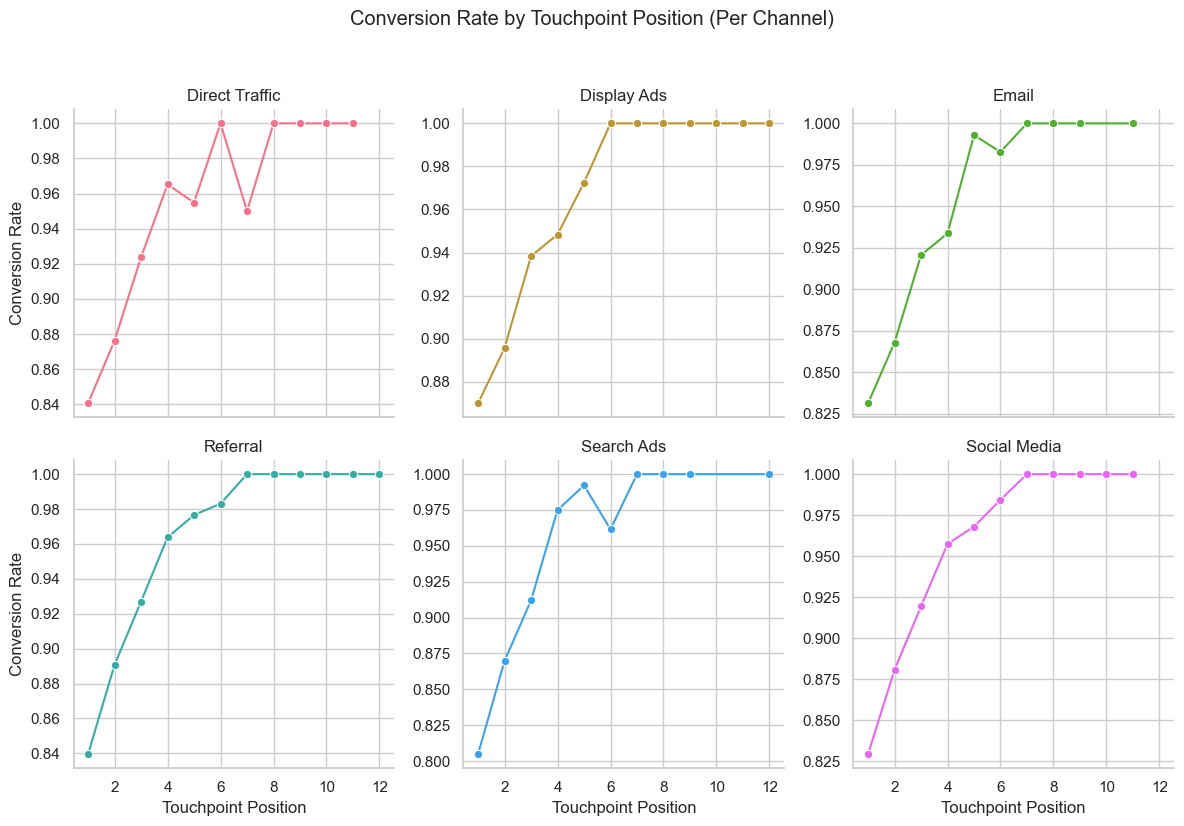

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming pos_summary already exists
channels = pos_summary['Channel'].unique()
palette = sns.color_palette("husl", len(channels))
color_dict = dict(zip(channels, palette))

# Create FacetGrid
g = sns.FacetGrid(pos_summary, col='Channel', col_wrap=3, sharey=False, height=4)

# Plot each channel with its color
for ax, channel in zip(g.axes.flat, channels):
    subset = pos_summary[pos_summary['Channel'] == channel]
    sns.lineplot(
        x='Position',
        y='Conversion',
        data=subset,
        ax=ax,
        marker='o',
        color=color_dict[channel]
    )
    # Set x-axis ticks to 2, 4, 6, 8, 10, 12
    ax.set_xticks(np.arange(2, 13, 2))

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Touchpoint Position", "Conversion Rate")
g.fig.suptitle("Conversion Rate by Touchpoint Position (Per Channel)", y=1.03)
plt.tight_layout()
plt.show()

#### These set of line graphs show the conversion rates at different touchpoint positions (from 1-12) across the 6 different channels.
#### A common pattern that can be observed from these graphs is that while conversion rates vary till the 5th/6th touchpoint position of every channel, the rates pleateau and touch 100% from the 8th touchpoint onwards.
#### This suggests that, of the users who end up converting after undergoing a long and complex journey, almost all end up converting and the channel placement doesn't play a huge role in conversion.
#### This visual also offers insights into how different channels can be effectively be tailored to maximize conversion rates as some channels start well early on in the journey whereas some of the channels show some dip in conversion rates upto the 6th touchpoint.
#### So the marketing campaigns can be tailored and sequenced effectively depending on channel strengths to maximize user conversion rates with a maximum of 4-5 touchpoints and users undergoing long and complex journeys dip beyond the 5th-6th touchpoint

#### No of Interactions across Channels

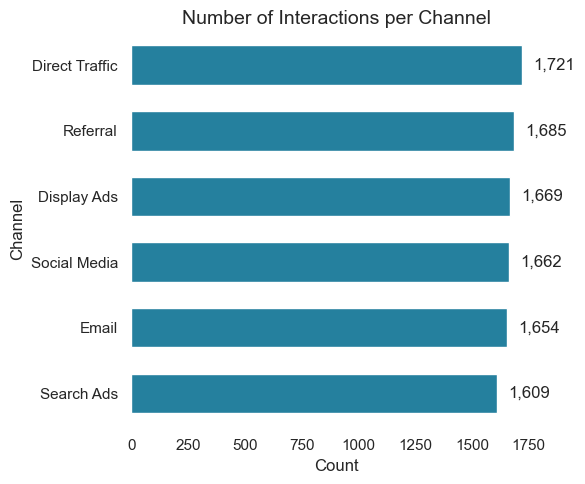

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and figure
plt.figure(figsize=(6, 5))
sns.set_style("white")

# Create the countplot
ax = sns.countplot(
    y='Channel',
    data=data,
    order=data['Channel'].value_counts().index,
    color="#118AB2",
    width=0.6
)

# Add value labels to each bar
for p in ax.patches:
    value = int(p.get_width())  # width corresponds to count since it's horizontal
    ax.text(
        p.get_width() + 50,       # small offset from the bar
        p.get_y() + p.get_height() / 2,
        f'{value:,}',             # formatted count
        va='center'
    )

# Aesthetics
plt.title("Number of Interactions per Channel", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

#### From the above plot it can be noted that the 10k+ Interactions are split across the 6 different channels and the Interactions are maximum for Direct Traffic and the least for Search Ads. However, Interactions needn't necessarily translate into conversions.

## Attribution Modelling

### Data-Driven Attribution Model/ Markov Model

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/Rohan/Downloads/multi_touch_attribution_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df.sort_values(['User ID', 'Timestamp'])

In [11]:
# Building User Journeys
journeys = (
    df.groupby('User ID')
      .apply(lambda g: (
          list(g['Channel']),
          1 if g.iloc[-1]['Conversion'] == 'Yes' else 0
      ))
      .reset_index(name='tmp')
)

journeys[['Path', 'Converted']] = pd.DataFrame(
    journeys['tmp'].tolist(),
    index=journeys.index
)
journeys.drop(columns='tmp', inplace=True)

print(journeys['Converted'].value_counts())


Converted
0    1437
1    1410
Name: count, dtype: int64


C:\Users\Rohan\AppData\Local\Temp\ipykernel_29028\4093560602.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (


In [12]:
#Building Transition Matrix
def build_transitions(journeys):
    rows = []
    for _, r in journeys.iterrows():
        end = 'Conversion' if r['Converted'] == 1 else 'Null'
        path = ['Start'] + r['Path'] + [end]
        rows.extend(zip(path[:-1], path[1:]))
    return pd.DataFrame(rows, columns=['From','To'])

transitions = build_transitions(journeys)

states = sorted(set(transitions['From']).union(transitions['To']))
idx = {s:i for i,s in enumerate(states)}

T = np.zeros((len(states), len(states)))

counts = transitions.groupby(['From','To']).size().reset_index(name='cnt')
out_counts = transitions.groupby('From').size()

for _, r in counts.iterrows():
    T[idx[r['From']], idx[r['To']]] = r['cnt'] / out_counts[r['From']]

# Absorbing states
for s in ['Conversion','Null']:
    i = idx[s]
    T[i,:] = 0
    T[i,i] = 1

In [13]:
# Absorbing Markov Conversion Probability
def conversion_probability(T, states):
    idx = {s:i for i,s in enumerate(states)}
    absorbing = ['Conversion','Null']

    A = [idx[s] for s in absorbing]
    Q = [i for i in range(len(states)) if i not in A]

    Qm = T[np.ix_(Q, Q)]
    Rm = T[np.ix_(Q, A)]

    N = np.linalg.inv(np.eye(len(Q)) - Qm)
    B = N @ Rm

    start_i = Q.index(idx['Start'])
    return B[start_i, absorbing.index('Conversion')]

In [14]:
#Channel Removal Effect -> Data-Driven Attribution
def remove_channel(T, states, channel):
    T2 = T.copy()
    idx = {s:i for i,s in enumerate(states)}

    if channel not in idx:
        return T2

    r = idx[channel]
    null_i = idx['Null']

    # Redirect all flow through removed channel to Null
    T2[:, null_i] += T2[:, r]
    T2[:, r] = 0
    T2[r, :] = 0
    T2[r, null_i] = 1

    return T2

In [15]:
#Markov Attribution
baseline = conversion_probability(T, states)

channels = df['Channel'].unique()
removal_effect = {}

for ch in channels:
    T_removed = remove_channel(T, states, ch)
    p_removed = conversion_probability(T_removed, states)
    removal_effect[ch] = baseline - p_removed

# Normalize
removal_effect = {k: max(v,0) for k,v in removal_effect.items()}
total = sum(removal_effect.values())

attribution = {k: v/total for k,v in removal_effect.items()}

attr_df = (
    pd.DataFrame(attribution.items(), columns=['Channel','Attributed_Conversion'])
      .sort_values('Attributed_Conversion', ascending=False)
)

attr_df

,Channel,Attributed_Conversion
5,Referral,0.173296
3,Direct Traffic,0.167165
1,Display Ads,0.166961
4,Email,0.165191
2,Social Media,0.164165
0,Search Ads,0.163222


#### Calculating Markov Conversion Rates per Channel

In [16]:
def conversion_probability_from_state(T, states, start_state):
    idx = {s:i for i,s in enumerate(states)}
    absorbing = ['Conversion', 'Null']

    absorb_idx = [idx[s] for s in absorbing]
    transient_idx = [i for i in range(len(states)) if i not in absorb_idx]

    Q = T[np.ix_(transient_idx, transient_idx)]
    R = T[np.ix_(transient_idx, absorb_idx)]

    N = np.linalg.inv(np.eye(len(Q)) - Q)
    B = N @ R

    start_i = transient_idx.index(idx[start_state])
    return B[start_i, absorbing.index('Conversion')]

In [17]:
markov_conversion_rate = {}

for ch in df['Channel'].unique():
    markov_conversion_rate[ch] = conversion_probability_from_state(T, states, ch)

markov_cr_df = (
    pd.DataFrame(markov_conversion_rate.items(),
                 columns=['Channel', 'Markov_Conversion_Rate'])
    .sort_values('Markov_Conversion_Rate', ascending=False)
)

markov_cr_df

,Channel,Markov_Conversion_Rate
5,Referral,0.509642
1,Display Ads,0.499152
4,Email,0.494980
2,Social Media,0.491850
0,Search Ads,0.490482
3,Direct Traffic,0.485072


### First-Touch Attribution Model

In [18]:
# First-touch conversion rate
first_touch = (
    df.sort_values(['User ID', 'Timestamp'])
      .groupby('User ID')
      .first()
)

first_touch_cr = (
    first_touch.groupby('Channel')['Conversion']
    .apply(lambda x: (x == 'Yes').mean())
    .sort_values(ascending=False)
)

first_touch_cr

Channel
Display Ads       0.516260
Direct Traffic    0.507157
Social Media      0.498934
Email             0.491111
Referral          0.483539
Search Ads        0.457701
Name: Conversion, dtype: float64

In [19]:
# First-touch attribution
first_touch_attr = (
    first_touch[first_touch['Conversion'] == 'Yes']
    .groupby('Channel')
    .size()
)

first_touch_attr = first_touch_attr / first_touch_attr.sum()

first_touch_attr

Channel
Direct Traffic    0.176764
Display Ads       0.181041
Email             0.157520
Referral          0.167498
Search Ads        0.150392
Social Media      0.166785
dtype: float64

### Last Touch Attribution Model

In [20]:
# Last-touch conversion rate
last_touch = (
    df.sort_values(['User ID', 'Timestamp'])
      .groupby('User ID')
      .tail(1)
)

last_touch_cr = (
    last_touch.groupby('Channel')['Conversion']
    .apply(lambda x: (x == 'Yes').mean())
    .sort_values(ascending=False)
)

last_touch_cr

Channel
Referral          0.549451
Display Ads       0.508547
Email             0.494737
Social Media      0.482533
Search Ads        0.479167
Direct Traffic    0.461840
Name: Conversion, dtype: float64

In [21]:
# Last-touch attribution
last_touch_attr = (
    last_touch[last_touch['Conversion'] == 'Yes']
    .groupby('Channel')
    .size()
)

last_touch_attr = last_touch_attr / last_touch_attr.sum()

last_touch_attr

Channel
Direct Traffic    0.167376
Display Ads       0.168794
Email             0.166667
Referral          0.177305
Search Ads        0.163121
Social Media      0.156738
dtype: float64

In [22]:
summary_df = pd.concat(
    [
        first_touch_cr.rename("First Touch CR"),
        first_touch_attr.rename("First Touch Attribution"),
        last_touch_cr.rename("Last Touch CR"),
        last_touch_attr.rename("Last Touch Attribution")
    ],
    axis=1
).fillna(0)

summary_df

,First Touch CR,First Touch Attribution,Last Touch CR,Last Touch Attribution
Channel,,,,
Display Ads,0.516260,0.181041,0.508547,0.168794
Direct Traffic,0.507157,0.176764,0.461840,0.167376
Social Media,0.498934,0.166785,0.482533,0.156738
Email,0.491111,0.157520,0.494737,0.166667
Referral,0.483539,0.167498,0.549451,0.177305
Search Ads,0.457701,0.150392,0.479167,0.163121


#### First-touch conversion rate measures acquisition quality, while first-touch attribution measures contribution to conversions. 
#### Similarly, last-touch conversion rate captures closing effectiveness, 
#### whereas last-touch attribution assigns full conversion credit to the final interaction. 
#### These metrics provide complementary insights and highlight the limitations of single-touch attribution.”

In [23]:
final_df = (
    markov_cr_df
    .merge(attr_df, on='Channel')
    .rename(columns={'Attributed_Conversion':'Markov_Attribution'})
)

final_df


,Channel,Markov_Conversion_Rate,Markov_Attribution
0,Referral,0.509642,0.173296
1,Display Ads,0.499152,0.166961
2,Email,0.494980,0.165191
3,Social Media,0.491850,0.164165
4,Search Ads,0.490482,0.163222
5,Direct Traffic,0.485072,0.167165


In [24]:
full_comparison_df = (
    summary_df
    .reset_index()                # Channel is index → make it a column
    .merge(
        final_df,
        on='Channel',
        how='left'
    )
)

full_comparison_df = full_comparison_df.sort_values(
    by='Markov_Attribution',
    ascending=False
)

full_comparison_df

,Channel,First Touch CR,First Touch Attribution,Last Touch CR,Last Touch Attribution,Markov_Conversion_Rate,Markov_Attribution
4,Referral,0.483539,0.167498,0.549451,0.177305,0.509642,0.173296
1,Direct Traffic,0.507157,0.176764,0.461840,0.167376,0.485072,0.167165
0,Display Ads,0.516260,0.181041,0.508547,0.168794,0.499152,0.166961
3,Email,0.491111,0.157520,0.494737,0.166667,0.494980,0.165191
2,Social Media,0.498934,0.166785,0.482533,0.156738,0.491850,0.164165
5,Search Ads,0.457701,0.150392,0.479167,0.163121,0.490482,0.163222


#### From the above table, the Conversion Rates and Attribution Scores have been computed for the First Touch, Ladt Touch and the Markov Attribution Models
#### Conversion Rates and Attribution Scores are different metrics and answer different business questions.
#### The Conversion Rate measures the probability of converting from a channel if a user interacts with a channel early on/middle/later on in the journey. It measures the traffic quality, channel effectiveness. Conversion Rates are important for marketing campaigns
#### The Attribution Score measures the credit of conversion that can be assigned to a channel of all the conversions that occur across different channels. It measures the channel importance and overall impact of a channel. Attribution Scores are important for budget allocation


#### First-touch and last-touch models highlight acquisition and conversion efficiency respectively, but they fail to capture the multi-step nature of customer journeys. Markov attribution accounts for inter-channel dependencies and provides a more balanced estimate of each channel’s contribution. The results show that all channels play a meaningful role, with no single channel dominating conversions, indicating a well-distributed multi-touch marketing funnel.

### Vizualizations

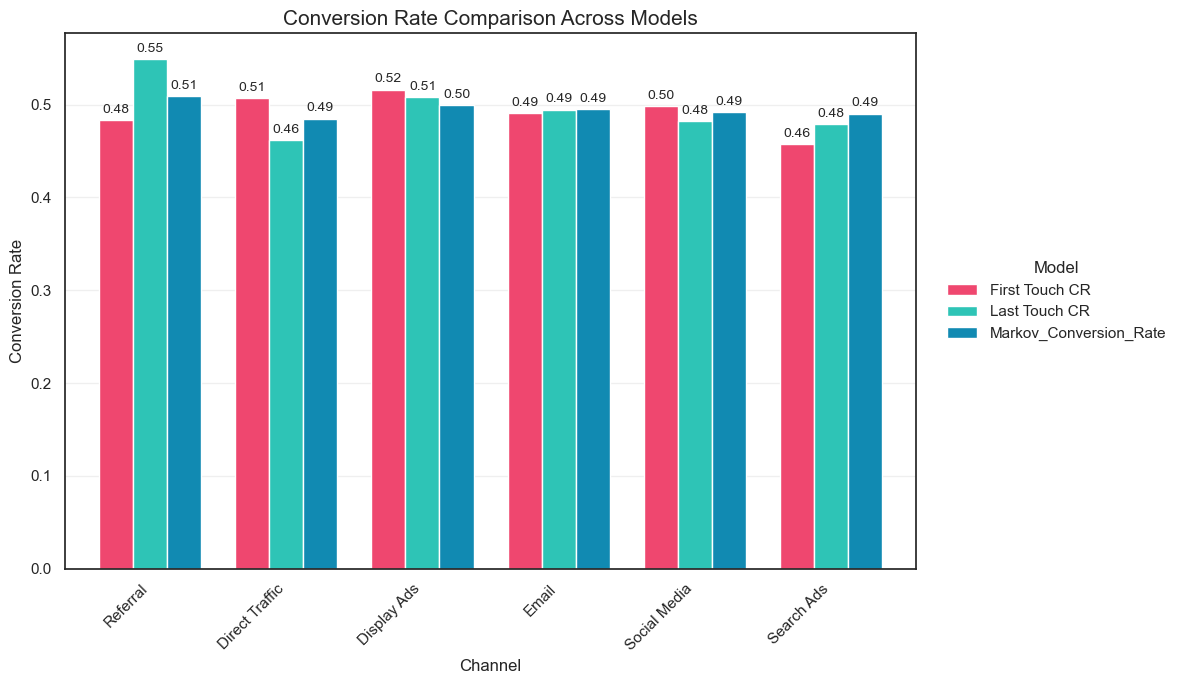

In [25]:
import matplotlib.pyplot as plt

# Prepare data
cr_plot_df = full_comparison_df[
    ['Channel', 'First Touch CR', 'Last Touch CR', 'Markov_Conversion_Rate']
].set_index('Channel')

# Colors
colors = ["#EF476F", "#2EC4B6", "#118AB2"]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

bars = cr_plot_df.plot(
    kind='bar',
    ax=ax,
    color=colors,
    width=0.75
)

# ---- Add value labels ----
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",
        padding=3,
        fontsize=10
    )

# Formatting
ax.set_title("Conversion Rate Comparison Across Models", fontsize=15)
ax.set_ylabel("Conversion Rate", fontsize=12)
ax.set_xlabel("Channel", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Legend on right
ax.legend(
    title="Model",
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This visualization compares conversion rates across three attribution models—First Touch, Last Touch, and Markov—for each marketing channel.

The First Touch Conversion Rate represents how effective a channel is at acquiring users who eventually convert. Channels such as Display Ads and Direct Traffic show relatively higher first-touch conversion rates, indicating strong performance in introducing high-intent users at the beginning of the journey.

The Last Touch Conversion Rate reflects how well a channel performs as the final interaction before conversion. Referral and Display Ads stand out in this case, suggesting that these channels are particularly effective at closing conversions once users are already engaged.

The Markov Conversion Rate provides a more balanced and realistic estimate by accounting for the entire sequence of touchpoints in a user journey. Unlike heuristic models, it distributes credit based on how each channel contributes to transitions leading to conversion. As a result, the Markov conversion rates appear more stable across channels, indicating that all channels play a meaningful supporting role rather than a single dominant one.

Overall, the comparison highlights that:

First-touch attribution emphasizes user acquisition strength.

Last-touch attribution emphasizes conversion-closing ability.

Markov attribution captures true multi-touch contribution, making it the most reliable model for understanding channel impact in complex user journeys.

This demonstrates why relying on a single attribution model can be misleading and why data-driven attribution provides a more holistic view of marketing performance.

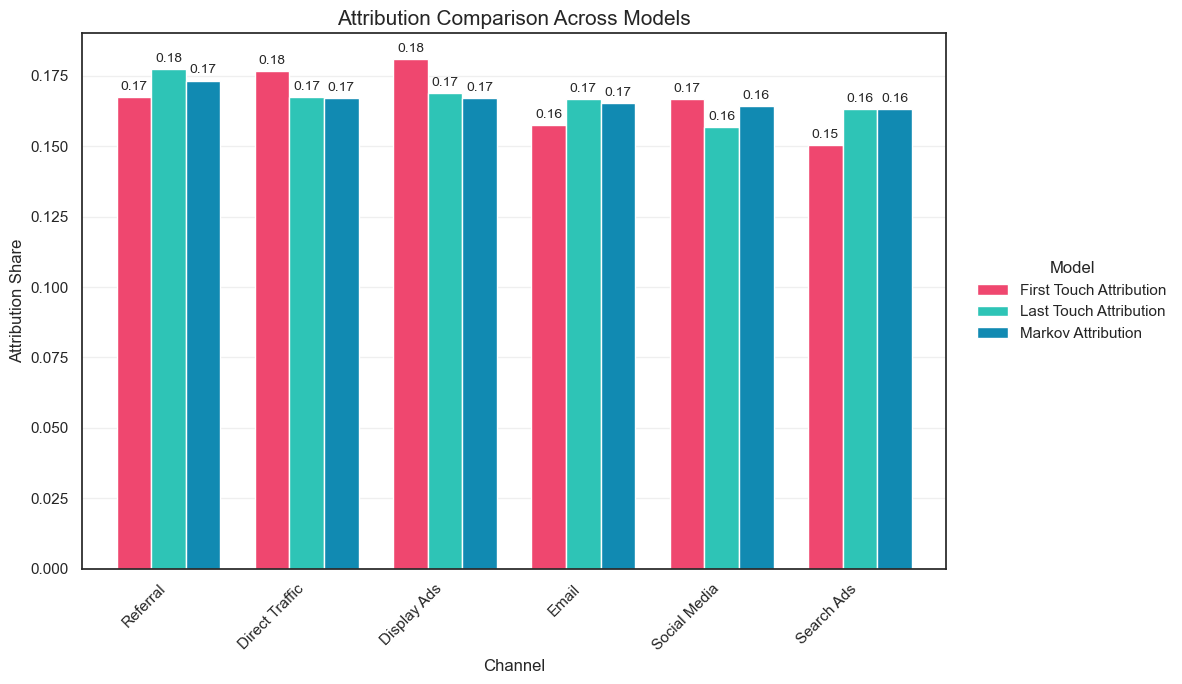

In [27]:
import matplotlib.pyplot as plt

# Prepare data
attr_plot_df = (
    full_comparison_df[
        ['Channel', 'First Touch Attribution', 'Last Touch Attribution', 'Markov_Attribution']
    ]
    .set_index('Channel')
    .rename(columns={'Markov_Attribution': 'Markov Attribution'})
)

# Colors: Red, Teal, Green
colors = ["#EF476F", "#2EC4B6", "#118AB2"]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
bars = attr_plot_df.plot(
    kind='bar',
    ax=ax,
    color=colors,
    width=0.75
)

# ---- Add value labels ----
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",
        padding=3,
        fontsize=10
    )

# Formatting
ax.set_title("Attribution Comparison Across Models", fontsize=15)
ax.set_ylabel("Attribution Share", fontsize=12)
ax.set_xlabel("Channel", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Legend on right
ax.legend(
    title="Model",
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

plt.tight_layout()
plt.show()

This visualization compares how attribution credit is distributed across marketing channels under three different models: First Touch, Last Touch, and Markov (Data-Driven) attribution.

The First Touch model assigns higher credit to channels that initiate user journeys, such as Display Ads and Direct Traffic, highlighting their role in customer acquisition. However, it does not account for the influence of later interactions.

The Last Touch model shifts more credit toward channels like Referral and Display Ads, which frequently appear just before conversion. While useful for identifying closing channels, this approach overlooks earlier touchpoints that helped move users through the funnel.

The Markov attribution model provides a more balanced and realistic distribution of credit across all channels. By accounting for the full sequence of user interactions, it captures both assisting and closing effects, resulting in a more even attribution spread. This indicates that conversions are driven by a combination of channels rather than a single dominant source.

Overall, this comparison highlights that while heuristic models (first- and last-touch) are useful for directional insights, Markov attribution offers the most reliable view of true channel contribution, making it better suited for data-driven marketing decisions and budget allocation.